In [30]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Zomato data .csv')


In [58]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [12]:
df.shape

(148, 7)

In [14]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [18]:
df.tail(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [22]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [24]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


Text(0.5, 0, 'Type of restaurant')

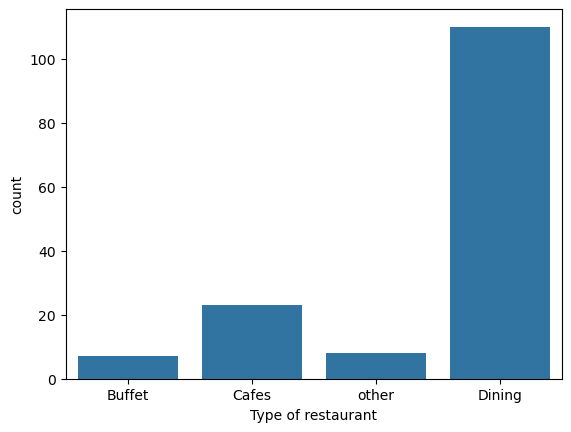

In [32]:
sn.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")


In [34]:
gp=df.groupby('listed_in(type)').agg({'votes':'sum'})

In [36]:
gp

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


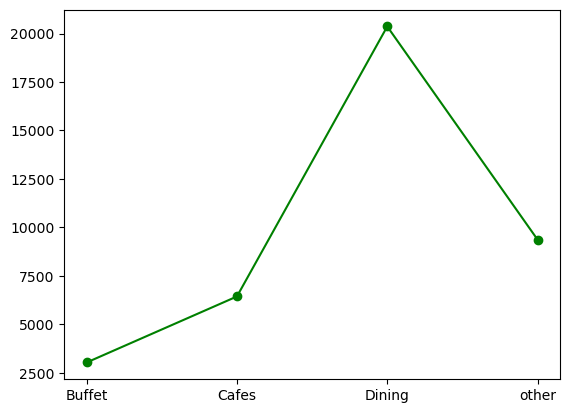

In [38]:
plt.plot(gp, c="green", marker="o")

In [40]:
res=df.groupby('name').agg({'votes':'max'})

In [42]:
res

,votes
name,
360 Atoms Restaurant And Cafe,13
Aarush's Food Plaza,0
Addhuri Udupi Bhojana,88
Amma - Manae,0
Anna Kuteera,771
...,...
Village Café,402
Wamama,354
Wood Stove,0


In [46]:
maxvote=df['votes'].max()

In [48]:
maxvote

4884

In [52]:
resmax=df.loc[df['votes']==maxvote,'name']
resmax

38    Empire Restaurant
Name: name, dtype: object

<Axes: xlabel='online_order', ylabel='count'>

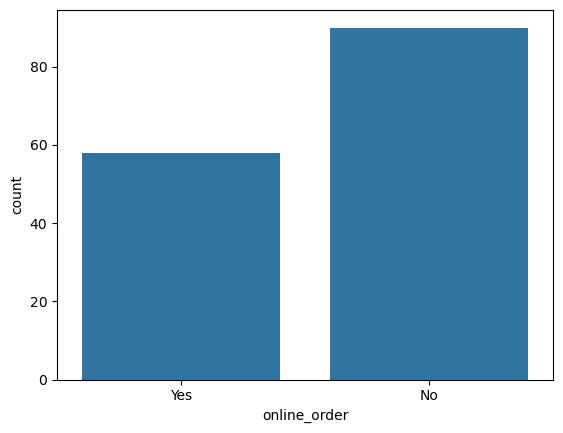

In [60]:
sn.countplot(x=df['online_order'])

(array([10., 30., 44., 51., 13.]),
 array([2.6, 3. , 3.4, 3.8, 4.2, 4.6]),
 <BarContainer object of 5 artists>)

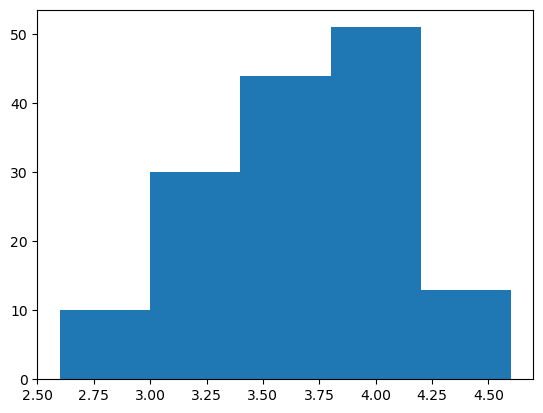

In [64]:
plt.hist(df['rate'],bins=5)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

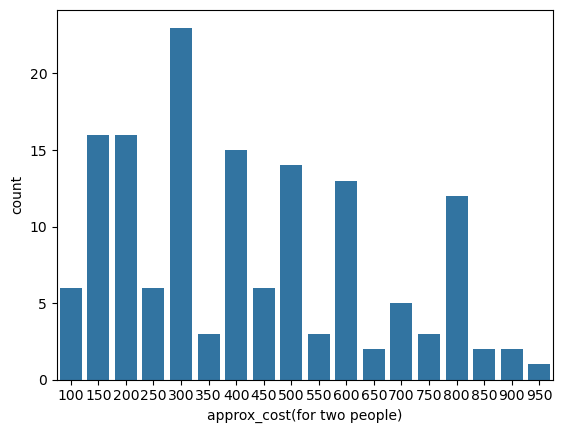

In [66]:
sn.countplot(x=df['approx_cost(for two people)'])

In [89]:
online=df.groupby('online_order').agg({'online_order':'count'})

In [87]:
online

,online_order
online_order,
No,90
Yes,58


<Axes: xlabel='online_order', ylabel='rate'>

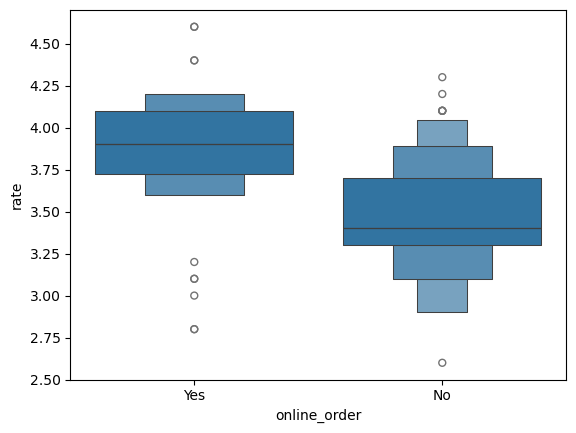

In [83]:
sn.boxenplot(x='online_order',y='rate',data=df)